In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout ,Bidirectional , LayerNormalization

In [ ]:
data = pd.read_csv('/content/HDFC_closing.csv' , parse_dates=True , index_col=0)


In [ ]:
data.head()

,Close
Date,
2023-01-02,1588.997070
2023-01-03,1599.286987
2023-01-04,1570.855469
2023-01-05,1560.272827
2023-01-06,1555.054810


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

In [ ]:
scaled_data

array([[0.44136228],
       [0.46167062],
       [0.40555773],
       [0.38467167],
       [0.37437331],
       [0.38024452],
       [0.32615272],
       [0.36753962],
       [0.38467167],
       [0.38688548],
       [0.35685602],
       [0.4018042 ],
       [0.45637688],
       [0.47014063],
       [0.50228777],
       [0.52509855],
       [0.56869926],
       [0.47803293],
       [0.47803293],
       [0.41575996],
       [0.41277641],
       [0.39189035],
       [0.43731988],
       [0.39150536],
       [0.49824514],
       [0.48486662],
       [0.48804291],
       [0.4884279 ],
       [0.48015061],
       [0.49391388],
       [0.49805264],
       [0.52634989],
       [0.51749488],
       [0.50989145],
       [0.49362526],
       [0.46186335],
       [0.47562662],
       [0.41325777],
       [0.39169785],
       [0.36301586],
       [0.37110089],
       [0.38765546],
       [0.38091814],
       [0.35570081],
       [0.41518272],
       [0.43597218],
       [0.43597218],
       [0.443

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [ ]:
SEQ_LENGTH = 60
X, y = create_sequences(scaled_data, SEQ_LENGTH)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]



In [ ]:
#making the model


## deciding the architecture

- input = were using 60 days as lag hence (60,1)
- (60 days for close prcing , if we used other factors wed get 60x3 or 4 and so on)

- first ltsm layer = 50 return_seq = sends all our current values to next layer


- droupout layer - drops nurons to prevent overfitting

- second layer of ltsm 50 (no retrn_seq as iske baad no other ltsm layer)
- second droput
- output layer


In [ ]:

#creating the model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    Dropout(0.2),  # Prevents overfitting
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2 = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, 1))),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

In [ ]:
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
#training the model

past = model.fit(
    X_train,y_train,
    epochs = 50,
    batch_size = 32,
    validation_data = (X_test, y_test)
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.1108 - val_loss: 0.0078
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0148 - val_loss: 0.0414
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0107 - val_loss: 0.0165
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0092 - val_loss: 0.0182
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0087 - val_loss: 0.0181
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0061 - val_loss: 0.0130
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0071 - val_loss: 0.0087
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0074 - val_loss: 0.0070
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0081 - val_loss: 0.0130
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - val_loss: 0.0104
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0

In [ ]:
import matplotlib.pyplot as plt


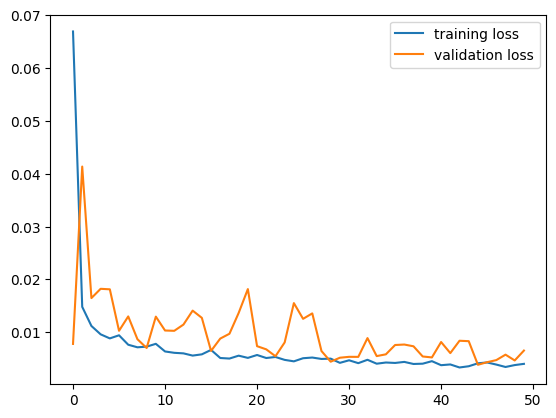

In [ ]:
plt.plot(past.history['loss'] , label = 'training loss')
plt.plot(past.history['val_loss'] , label = 'validation loss')
plt.legend()
plt.show()

from observing the validatin loss its obvisou the model hasnt training well

will try increassing epochs


In [ ]:
# predicting shit

y_pred = model.predict(X_test)

y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"LSTM RMSE: {rmse:.2f}")

LSTM RMSE: 41.04


## ltsm results
- atleast smaller rmse than the arima model

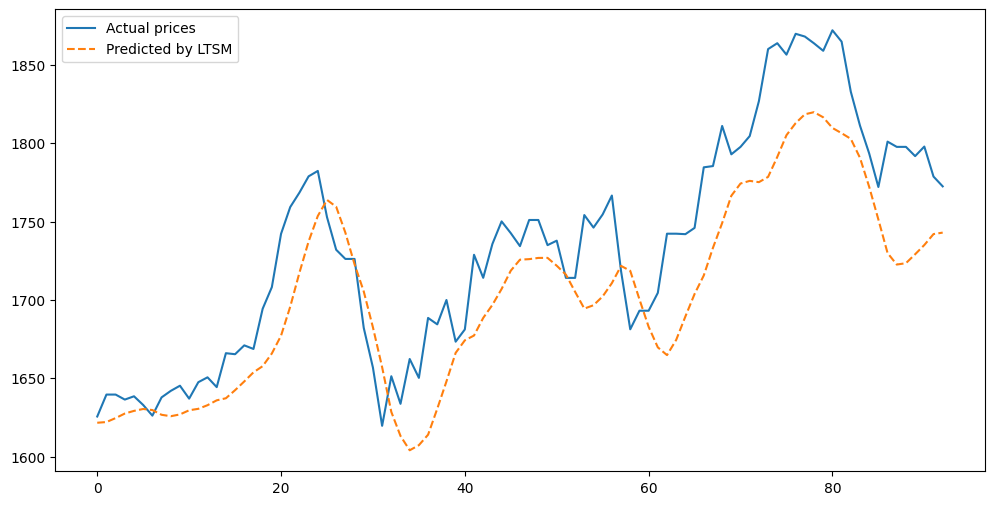

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label = 'Actual prices')
plt.plot(y_pred_actual, label = 'Predicted by LTSM' , linestyle =  '--')
plt.legend()
plt.show()

## Further modificaitons
- fine tuning of parameters
- adding more features such as stock volume etc(tomorrow)




In [ ]:
# lets predict values

last_seq = scaled_data[-SEQ_LENGTH:]
last_seq = last_seq.reshape((1,SEQ_LENGTH,1))
print(last_seq)

[[[0.52958857]
  [0.58603417]
  [0.562252  ]
  [0.63774279]
  [0.62965102]
  [0.66034059]
  [0.60784247]
  [0.62323677]
  [0.71727959]
  [0.6882673 ]
  [0.73089734]
  [0.75931745]
  [0.74451534]
  [0.72813448]
  [0.76109376]
  [0.76109376]
  [0.72941713]
  [0.73504213]
  [0.68816876]
  [0.68816876]
  [0.76731069]
  [0.75152177]
  [0.76810019]
  [0.79188211]
  [0.69665517]
  [0.62343408]
  [0.64682138]
  [0.64682138]
  [0.66932064]
  [0.74382462]
  [0.74382462]
  [0.74323244]
  [0.7511269 ]
  [0.82740719]
  [0.82898618]
  [0.87951068]
  [0.84378829]
  [0.85316296]
  [0.86678096]
  [0.91079244]
  [0.97631661]
  [0.98371767]
  [0.96931018]
  [0.99555937]
  [0.99210554]
  [0.98352012]
  [0.97414545]
  [1.        ]
  [0.98569129]
  [0.92263413]
  [0.87990531]
  [0.84487364]
  [0.80263846]
  [0.85977453]
  [0.85316296]
  [0.85316296]
  [0.84151859]
  [0.85355759]
  [0.81576281]
  [0.80342771]]]


In [ ]:
next_day_pred = model.predict(last_seq)
next_day_price = scaler.inverse_transform(next_day_pred)[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
print("jan first price was" , data[-1:])
print(f"Predicted next day closing price: {next_day_price:.2f}")


jan first price was                   Close
Date                   
2024-12-31  1772.449951
Predicted next day closing price: 1739.63



**off** by 10 rs

In [ ]:
#well now do 1 year prediction easier

In [ ]:
train = data["2023-01-02":"2023-12-31"]
test = data["2024-01-01":"2024-12-31"]

In [ ]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train.values.reshape(-1,1))

In [ ]:
SEQ_LENGTH = 60
X_train, y_train = create_sequences(scaled_train, SEQ_LENGTH)


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0094
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0080
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0085
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0107
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0085
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0086
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0090
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0082
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0089
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0075
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0068
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0089
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0072
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━

In [ ]:
scaled_test = scaler.transform(test.values.reshape(-1, 1))


In [ ]:
X_test , y_test = create_sequences(scaled_test,SEQ_LENGTH)
y_pred = model.predict(X_test)
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Backtest RMSE (2024): {rmse:.2f}")

Backtest RMSE (2024): 31.85


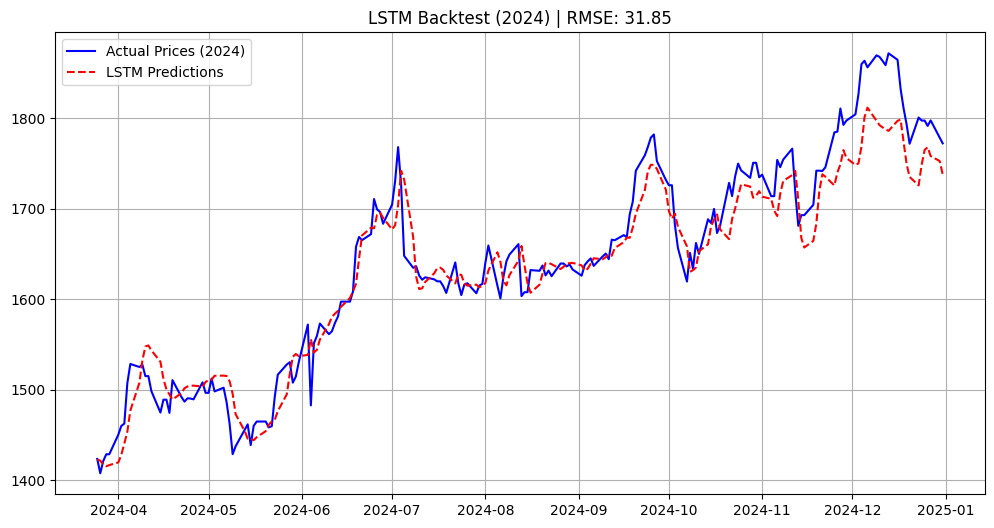

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index[SEQ_LENGTH:], y_test_actual, label="Actual Prices (2024)", color="blue")
plt.plot(test.index[SEQ_LENGTH:], y_pred_actual, label="LSTM Predictions", color="red", linestyle="--")
plt.title(f"LSTM Backtest (2024) | RMSE: {rmse:.2f}")
plt.legend()
plt.grid()
plt.show()

model improvements to be tried

- increase depth  - 50rmse
- add biredirectionality
- adjust seqlenght and dropout
- other parameters added other than just closing


In [ ]:
model2.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2409 - mae: 0.4067
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0433 - mae: 0.1752
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0411 - mae: 0.1634
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0287 - mae: 0.1404
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0244 - mae: 0.1228
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0215 - mae: 0.1172
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0186 - mae: 0.1088
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0200 - mae: 0.1137
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0176 - mae: 0.1054
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0218 - mae: 0.1181
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0182 - mae: 0.1078
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0182 - mae: 0.1071
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0

In [ ]:
scaled_test = scaler.transform(test.values.reshape(-1, 1))

X_test , y_test = create_sequences(scaled_test,SEQ_LENGTH)
y_pred = model2.predict(X_test)
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Backtest RMSE model 2(2024): {rmse:.2f}")

Backtest RMSE model 2(2024): 35.72


# adding other feautres OHLCV

- open prices help us assess overnight kya hua
- high/low give us volatility
- volume traded tells us about prices


In [ ]:
import yfinance as yf
stocks = ["HDFCBANK.BO"]
start_date = "2023-01-01"
end_date = "2025-01-01"

data= yf.download(stocks , start=start_date , end=end_date)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.BO,HDFCBANK.BO,HDFCBANK.BO,HDFCBANK.BO,HDFCBANK.BO
Date,,,,,
2023-01-02,1588.997070,1598.604278,1578.755859,1582.072085,125622
2023-01-03,1599.286987,1603.090890,1584.510478,1584.510478,175881
2023-01-04,1570.855591,1605.187986,1567.831900,1594.702936,155737
2023-01-05,1560.272827,1578.316866,1550.811947,1574.513082,152796
2023-01-06,1555.054688,1569.246127,1539.595360,1560.321620,175478


In [ ]:
data["Close"]

Ticker,HDFCBANK.BO
Date,
2023-01-02,1588.997070
2023-01-03,1599.286987
2023-01-04,1570.855591
2023-01-05,1560.272827
2023-01-06,1555.054688
...,...
2024-12-24,1797.650024
2024-12-26,1791.750000
2024-12-27,1797.849976


In [ ]:
data.isnull().sum()

,,0
Price,Ticker,
Close,HDFCBANK.BO,0
High,HDFCBANK.BO,0
Low,HDFCBANK.BO,0
Open,HDFCBANK.BO,0
Volume,HDFCBANK.BO,0


In [ ]:
df_scaled = scaler.fit_transform(data[['Open' , 'High' , 'Low', 'Close' , 'Volume']])

In [ ]:
def create_sequences(data, seq_length, target_col_name = 'Close'):
    X, y = [], []
    feature_data = data.drop(columns= [target_col_name])
    target_data = data[target_col_name]
    for i in range(len(data) - seq_length):
        X.append(feature_data.iloc[i:i+seq_length].values)  # All features (seq_length, n_features)
        y.append(target_data.iloc[i+seq_length])  # Target (Close price)
    return np.array(X), np.array(y)

In [ ]:

data.index = pd.to_datetime(data.index)


In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.BO,HDFCBANK.BO,HDFCBANK.BO,HDFCBANK.BO,HDFCBANK.BO
Date,,,,,
2023-01-02,1588.997070,1598.604278,1578.755859,1582.072085,125622
2023-01-03,1599.286987,1603.090890,1584.510478,1584.510478,175881
2023-01-04,1570.855591,1605.187986,1567.831900,1594.702936,155737
2023-01-05,1560.272827,1578.316866,1550.811947,1574.513082,152796
2023-01-06,1555.054688,1569.246127,1539.595360,1560.321620,175478
...,...,...,...,...,...
2024-12-24,1797.650024,1806.150024,1789.099976,1803.949951,196465
2024-12-26,1791.750000,1811.400024,1781.750000,1797.500000,104648


In [ ]:
data.index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=472, freq=None)

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

In [ ]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

In [ ]:
data_scaled = pd.DataFrame(scaler.fit_transform(data[features]),
                          columns=features,
                          index=data.index)

In [ ]:
data_scaled['Close'].values #.values gives us numpy array


array([0.44136228, 0.46167062, 0.40555797, 0.38467167, 0.37437307,
       0.38024452, 0.32615272, 0.36753962, 0.38467167, 0.38688548,
       0.35685602, 0.4018042 , 0.45637712, 0.47014063, 0.50228777,
       0.52509855, 0.56869926, 0.47803293, 0.41576021, 0.41277665,
       0.39189035, 0.43732012, 0.3915056 , 0.49824514, 0.48486662,
       0.48804291, 0.48842766, 0.48015061, 0.49391388, 0.49805264,
       0.52634989, 0.51749488, 0.50989121, 0.49362526, 0.46186335,
       0.47562686, 0.41325777, 0.39169809, 0.36301586, 0.37110089,
       0.38765546, 0.38091814, 0.35570106, 0.41518272, 0.43597242,
       0.44376858, 0.44598216, 0.36340085, 0.32490138, 0.31758633,
       0.27119456, 0.29179176, 0.33240892, 0.31036789, 0.34559495,
       0.33770266, 0.31335168, 0.31161899, 0.31874154, 0.34703878,
       0.36291974, 0.40401777, 0.40517274, 0.48939037, 0.512875  ,
       0.49709017, 0.50786989, 0.54839092, 0.56484936, 0.51431883,
       0.49737879, 0.51220114, 0.52384745, 0.52731236, 0.55551

In [ ]:
train = data_scaled["2023-01-02":"2023-12-31"]
test = data_scaled["2024-01-01":"2024-12-31"]

In [ ]:
train["Close"]

,Close
Date,
2023-01-02,0.441362
2023-01-03,0.461671
2023-01-04,0.405558
2023-01-05,0.384672
2023-01-06,0.374373
...,...
2023-12-22,0.558217
2023-12-26,0.582361
2023-12-27,0.620815


In [ ]:
SEQ_LENGTH = 60
target_col_idx = data_scaled.columns.get_loc(target)
X_train, y_train = create_sequences(train, SEQ_LENGTH)
X_test , y_test = create_sequences(test , SEQ_LENGTH )

In [ ]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (170, 60, 4), y_train: (170,)
X_test: (182, 60, 4), y_test: (182,)


In [ ]:
model3 = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, 4)),
    Dropout(0.2),  # Prevents overfitting
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model3.compile(optimizer = 'adam' , loss='mse')

In [ ]:
X_train.size

40800

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
model3.fit(X_train , y_train ,
           epochs = 100 ,
           batch_size = 32,
           validation_split=0.2,
    #        callbacks=[
    #       EarlyStopping(patience=15, restore_best_weights=True),
    #       ReduceLROnPlateau(factor=0.5, patience=5)
    # ]
 )

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.1844 - val_loss: 0.0206
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0172 - val_loss: 0.0047
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0244 - val_loss: 0.0131
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0104 - val_loss: 0.0245
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0154 - val_loss: 0.0159
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0084 - val_loss: 0.0065
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - val_loss: 0.0053
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0094 - val_loss: 0.0112
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0089 - val_loss: 0.0131
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - val_loss: 0.0086
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0070 - val_l

earlystopping - monitors my validatino loss and stops if no improvement

prevents overfitting and saves time

redce learning rate by by a factor of 0.5 if no imrovement

helps jump a minima

In [ ]:
y_pred = model3.predict(X_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
y_pred.size

182

Never mix feature/target scaling: Use separate scalers to avoid shape issues.

as intial scaler was for 5 index and we cant rescale just 1

In [ ]:
dummy_array = np.zeros((len(y_pred), 5))
close_column_idx = 3  # Position of 'Close'
dummy_array[:, close_column_idx] = y_pred.reshape(-1)

# Inverse transform
y_pred_actual = scaler.inverse_transform(dummy_array)[:, close_column_idx]

In [ ]:
y_pred_actual

array([1397.99515631, 1405.3032369 , 1414.94102895, 1424.05270524,
       1437.37225808, 1455.78091485, 1473.78953263, 1486.34505962,
       1489.13581934, 1484.53145238, 1475.83556476, 1468.1159236 ,
       1459.54005372, 1456.35821708, 1456.22908627, 1457.89113111,
       1460.02000387, 1461.33421169, 1463.06358152, 1466.48111228,
       1470.20726439, 1472.20428072, 1474.57850429, 1475.26409128,
       1471.60981692, 1465.14916152, 1455.18552238, 1445.26390001,
       1440.57604311, 1438.50038405, 1438.05482499, 1439.61381735,
       1443.98415123, 1449.26860864, 1454.08691009, 1462.68931131,
       1475.3060099 , 1489.80844265, 1499.04059724, 1505.83739442,
       1510.14172458, 1517.9408541 , 1519.90819065, 1519.64891731,
       1525.35727984, 1530.01178758, 1534.41052525, 1537.94449496,
       1542.82647466, 1547.76779882, 1546.40610789, 1548.53024669,
       1550.20832056, 1563.44125769, 1577.02763406, 1585.75419808,
       1596.77453844, 1612.9540409 , 1625.79708648, 1628.74975

In [ ]:
dummy_array = np.zeros((len(y_test), 5))
close_column_idx = 3  # Position of 'Close'
dummy_array[:, close_column_idx] = y_test.reshape(-1)

# Inverse transform
y_test_actual = scaler.inverse_transform(dummy_array)[:, close_column_idx]

In [ ]:
y_test_actual

array([1460.02380371, 1462.58898926, 1507.32836914, 1528.53881836,
       1525.23400879, 1527.74963379, 1515.12194824, 1498.44946289,
       1474.82189941, 1489.07739258, 1474.47668457, 1510.68261719,
       1491.93835449, 1486.90698242, 1490.60644531, 1490.31054688,
       1489.42272949, 1508.21618652, 1496.62438965, 1512.35961914,
       1498.20288086, 1502.29699707, 1486.11779785, 1462.24353027,
       1428.80004883, 1437.59997559, 1455.80004883, 1461.80004883,
       1438.84997559, 1460.15002441, 1464.90002441, 1458.40002441,
       1459.75      , 1492.19995117, 1516.65002441, 1527.94995117,
       1530.5       , 1507.84997559, 1514.59997559, 1530.84997559,
       1572.09997559, 1482.75      , 1551.30004883, 1559.44995117,
       1573.25      , 1561.5       , 1564.75      , 1573.84997559,
       1580.90002441, 1597.44995117, 1608.75      , 1658.        ,
       1669.        , 1665.40002441, 1672.09997559, 1710.90002441,
       1699.5       , 1696.5       , 1683.55004883, 1704.75   

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Backtest RMSE (2024): {rmse:.2f}")

Backtest RMSE (2024): 84.17


[]

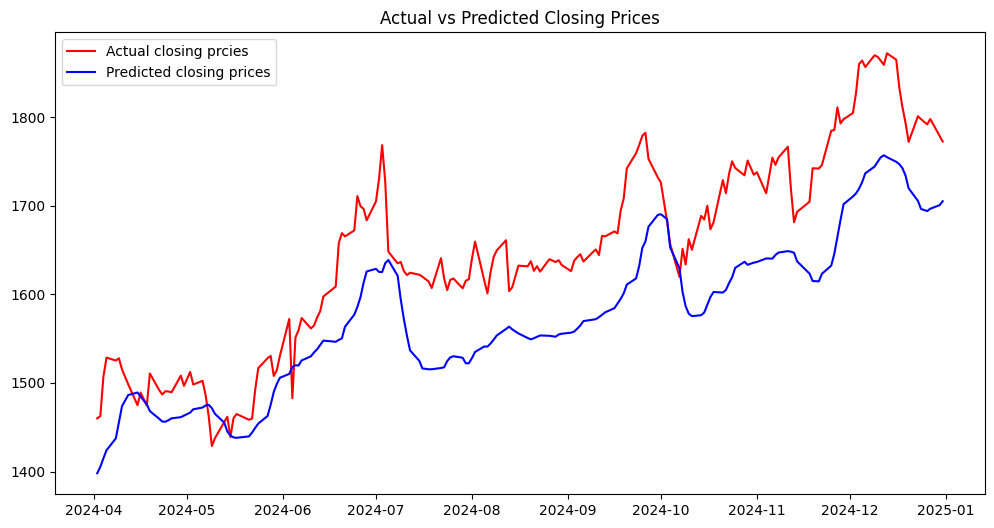

In [ ]:
test_dates = data["2024-01-01":"2024-12-31"].index[SEQ_LENGTH:]

plt.figure(figsize = (12,6))
plt.plot(test_dates,y_test_actual , label = 'Actual closing prcies' , color = 'red')
plt.plot(test_dates,y_pred_actual,label = "Predicted closing prices" , color = 'blue')

plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.plot()